In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

In [2]:
train = pd.read_csv('final_ml_data.csv')

In [3]:
train.head()

,facility_id,measure_code,measure_desc,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,271331,ED_2b,Average (median) time patients spent in the em...,H_RECMND_DY,46,3,83.0,NaN,NaN,NaN,0
1,450346,OP_22,Left before being seen,H_RECMND_DN,3,2,NaN,NaN,5.0,NaN,1
2,390073,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DY,55,3,NaN,NaN,NaN,174.0,0
3,191326,SEP_1,Appropriate care for severe sepsis and septic ...,H_RECMND_DY,31,3,NaN,83.0,NaN,NaN,0
4,390256,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DN,3,4,NaN,NaN,NaN,234.0,1


In [4]:
train.isnull()

,facility_id,measure_code,measure_desc,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,True,True,False,True,False
2,False,False,False,False,False,False,True,True,True,False,False
3,False,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4707,False,False,False,False,False,False,True,False,True,True,False
4708,False,False,False,False,False,False,False,True,True,True,False
4709,False,False,False,False,False,False,False,True,True,True,False
4710,False,False,False,False,False,False,False,True,True,True,False


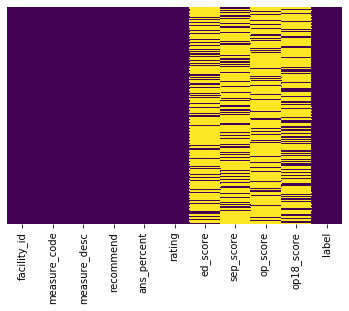

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

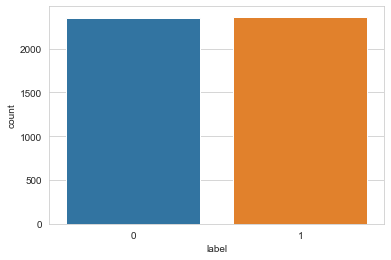

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=train)

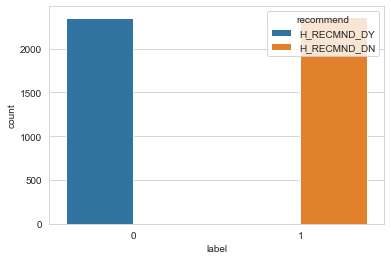

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='label',hue='recommend',data=train) #,palette='RdBu_r'

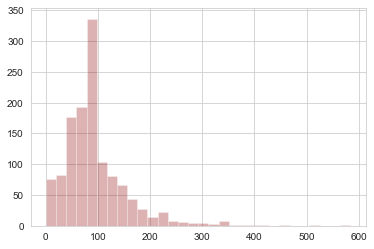

In [8]:
train['ed_score'].hist(bins=30,color='darkred',alpha=0.3)

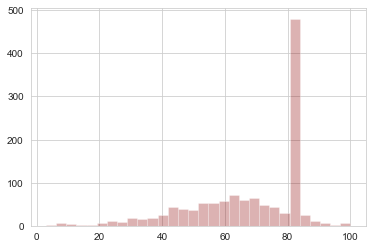

In [9]:
train['sep_score'].hist(bins=30,color='darkred',alpha=0.3)

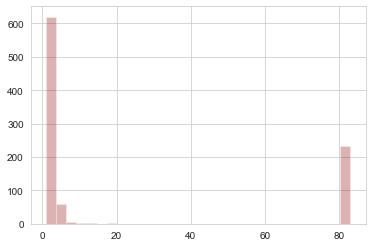

In [10]:
train['op_score'].hist(bins=30,color='darkred',alpha=0.3)

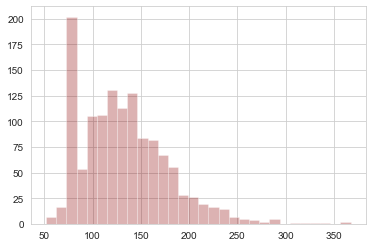

In [11]:
train['op18_score'].hist(bins=30,color='darkred',alpha=0.3)

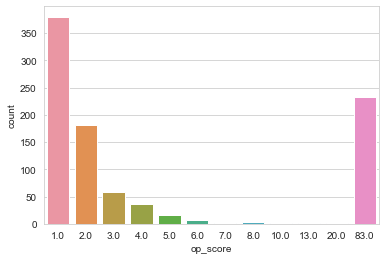

In [12]:
sns.countplot(x='op_score',data=train)

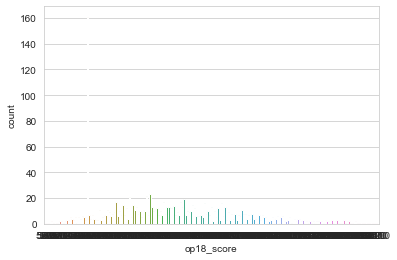

In [13]:
sns.countplot(x='op18_score',data=train)

In [14]:
train['op_score'].median()

2.0

In [15]:
train['op_score'].mean()

22.29641693811075

In [16]:
train['op_score'].mode()

0    1.0
dtype: float64

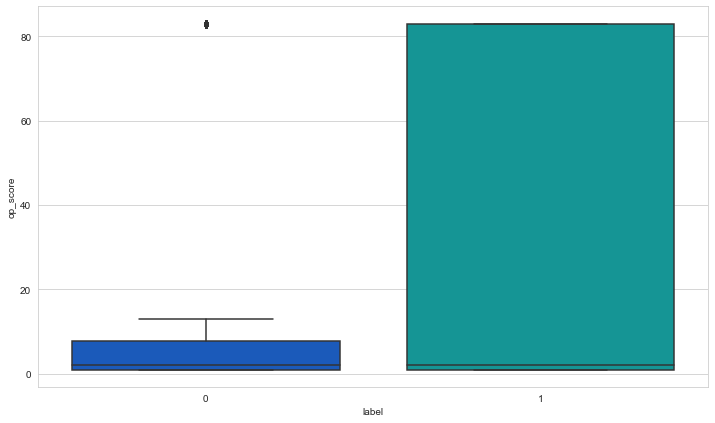

In [17]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='op_score',data=train,palette='winter')

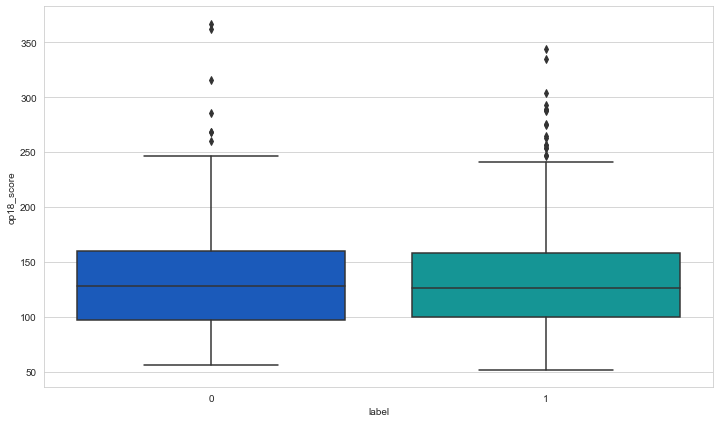

In [18]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='op18_score',data=train,palette='winter')

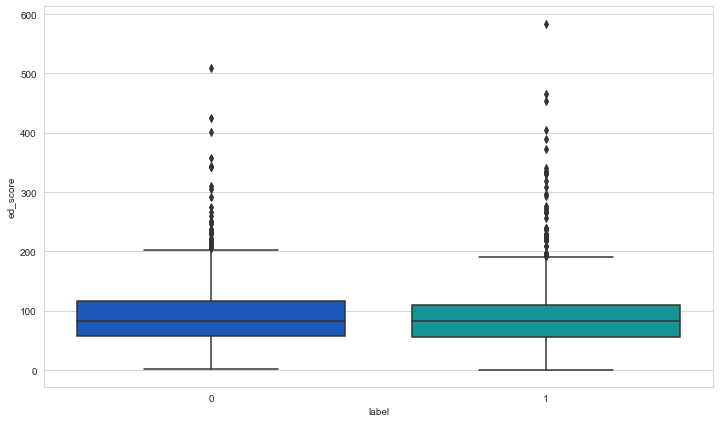

In [19]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='ed_score',data=train,palette='winter')

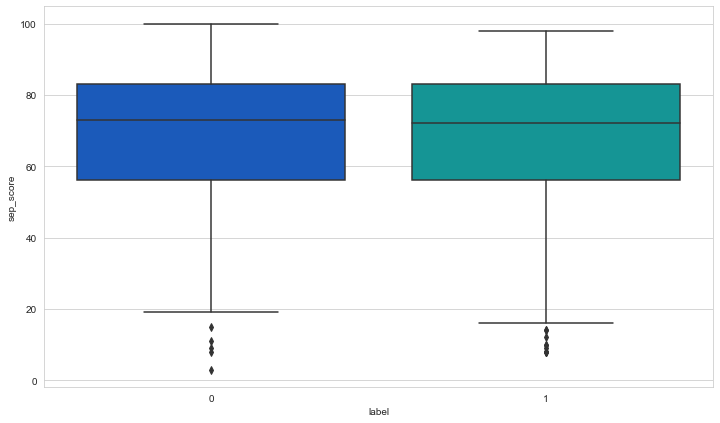

In [20]:
# missing imputation
plt.figure(figsize=(12, 7))
sns.boxplot(x='label',y='sep_score',data=train,palette='winter')

In [21]:
def impute_mis(cols):
    op_score = cols[0]
    label = cols[1]
    
    if pd.isnull(op_score):

        if label == 0:
            return 22

        else:
            return 22

    else:
        return op_score

In [22]:
def impute_mis1(cols):
    ed_score = cols[0]
    label = cols[1]
    
    if pd.isnull(ed_score):

        if label == 0:
            return 80

        else:
            return 80

    else:
        return ed_score

In [23]:
def impute_mis2(cols):
    op18_score = cols[0]
    label = cols[1]
    
    if pd.isnull(op18_score):

        if label == 0:
            return 125

        else:
            return 125

    else:
        return op18_score

In [24]:
def impute_mis3(cols):
    sep_score = cols[0]
    label = cols[1]
    
    if pd.isnull(sep_score):

        if label == 0:
            return 72

        else:
            return 72

    else:
        return sep_score

In [25]:
train['op_score'] = train[['op_score','label']].apply(impute_mis,axis=1)

In [26]:
train['op18_score'] = train[['op18_score','label']].apply(impute_mis1,axis=1)

In [27]:
train['sep_score'] = train[['sep_score','label']].apply(impute_mis2,axis=1)

In [28]:
train['ed_score'] = train[['ed_score','label']].apply(impute_mis3,axis=1)

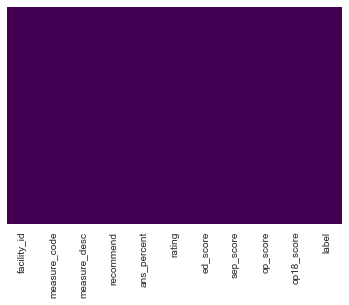

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
train.head()

,facility_id,measure_code,measure_desc,recommend,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
0,271331,ED_2b,Average (median) time patients spent in the em...,H_RECMND_DY,46,3,83.0,125.0,22.0,80.0,0
1,450346,OP_22,Left before being seen,H_RECMND_DN,3,2,72.0,125.0,5.0,80.0,1
2,390073,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DY,55,3,72.0,125.0,22.0,174.0,0
3,191326,SEP_1,Appropriate care for severe sepsis and septic ...,H_RECMND_DY,31,3,72.0,83.0,22.0,80.0,0
4,390256,OP_18b,Average (median) time patients spent in the em...,H_RECMND_DN,3,4,72.0,125.0,22.0,234.0,1


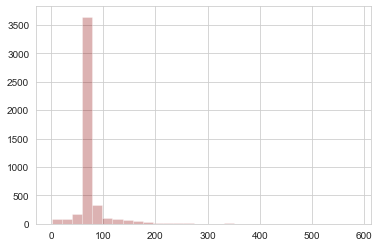

In [31]:
train['ed_score'].hist(bins=30,color='darkred',alpha=0.3);

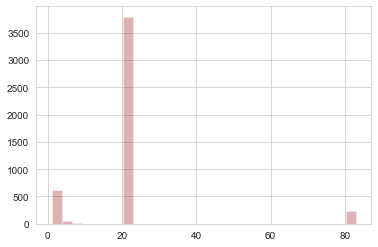

In [32]:
train['op_score'].hist(bins=30,color='darkred',alpha=0.3);


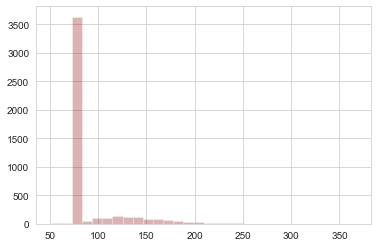

In [33]:
train['op18_score'].hist(bins=30,color='darkred',alpha=0.3);


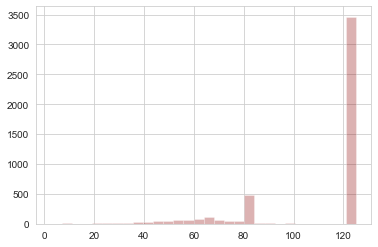

In [34]:
train['sep_score'].hist(bins=30,color='darkred',alpha=0.3);

In [35]:
train.describe()

,facility_id,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000
mean,267203.396435,37.442487,3.169567,77.946307,109.848048,22.057937,94.491935,0.501698
std,156620.099969,31.817693,0.947073,34.466752,26.889347,15.585694,33.346695,0.500050
min,10001.000000,0.000000,1.000000,1.000000,3.000000,1.000000,52.000000,0.000000
25%,140170.750000,5.000000,3.000000,72.000000,83.000000,22.000000,80.000000,0.000000
50%,260014.000000,31.000000,3.000000,72.000000,125.000000,22.000000,80.000000,1.000000
75%,390194.250000,70.000000,4.000000,72.000000,125.000000,22.000000,83.000000,1.000000
max,670130.000000,100.000000,5.000000,584.000000,125.000000,83.000000,367.000000,1.000000


In [77]:
train.corr(method ='pearson') 

,facility_id,ans_percent,rating,ed_score,sep_score,op_score,op18_score,label
facility_id,1.000000,-0.006890,0.089251,-0.034295,-0.033581,0.016493,-0.032182,0.008944
ans_percent,-0.006890,1.000000,0.044565,-0.012012,-0.003486,-0.034718,-0.003312,-0.904581
rating,0.089251,0.044565,1.000000,-0.087652,0.008380,-0.010143,-0.055626,-0.000832
ed_score,-0.034295,-0.012012,-0.087652,1.000000,0.097236,-0.000641,-0.074992,0.004605
sep_score,-0.033581,-0.003486,0.008380,0.097236,1.000000,0.002095,0.244937,-0.004243
op_score,0.016493,-0.034718,-0.010143,-0.000641,0.002095,1.000000,-0.001616,0.008363
op18_score,-0.032182,-0.003312,-0.055626,-0.074992,0.244937,-0.001616,1.000000,0.002318
label,0.008944,-0.904581,-0.000832,0.004605,-0.004243,0.008363,0.002318,1.000000


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   facility_id   4712 non-null   int64  
 1   measure_code  4712 non-null   object 
 2   measure_desc  4712 non-null   object 
 3   recommend     4712 non-null   object 
 4   ans_percent   4712 non-null   int64  
 5   rating        4712 non-null   int64  
 6   ed_score      4712 non-null   float64
 7   sep_score     4712 non-null   float64
 8   op_score      4712 non-null   float64
 9   op18_score    4712 non-null   float64
 10  label         4712 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 405.1+ KB


In [37]:
from pandas.plotting import scatter_matrix

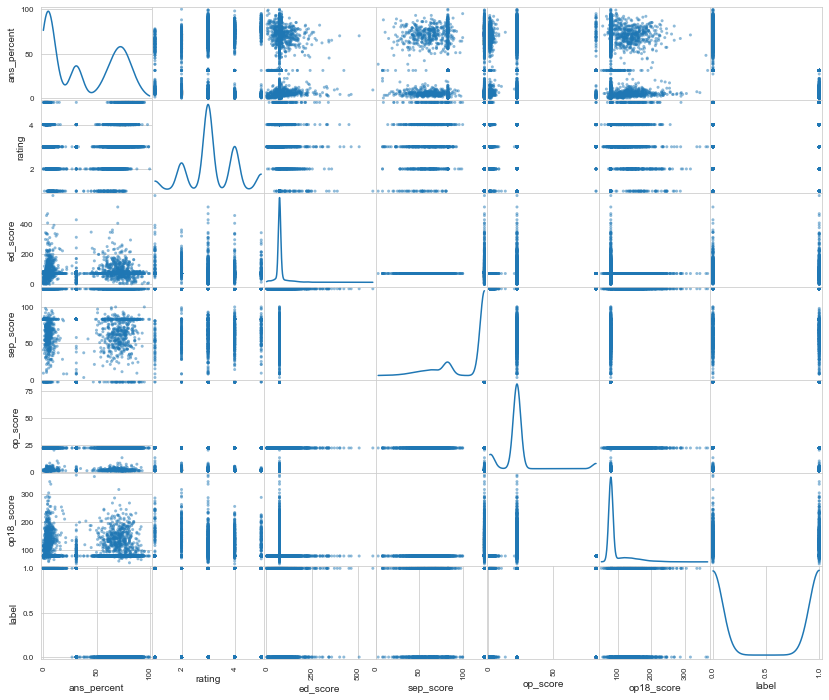

In [70]:
sm=scatter_matrix(train.loc[:,'recommend':'label' ],figsize=(14,12),diagonal="kde");

In [71]:
plt.savefig('eda11.png',dpi=300)

<Figure size 432x288 with 0 Axes>

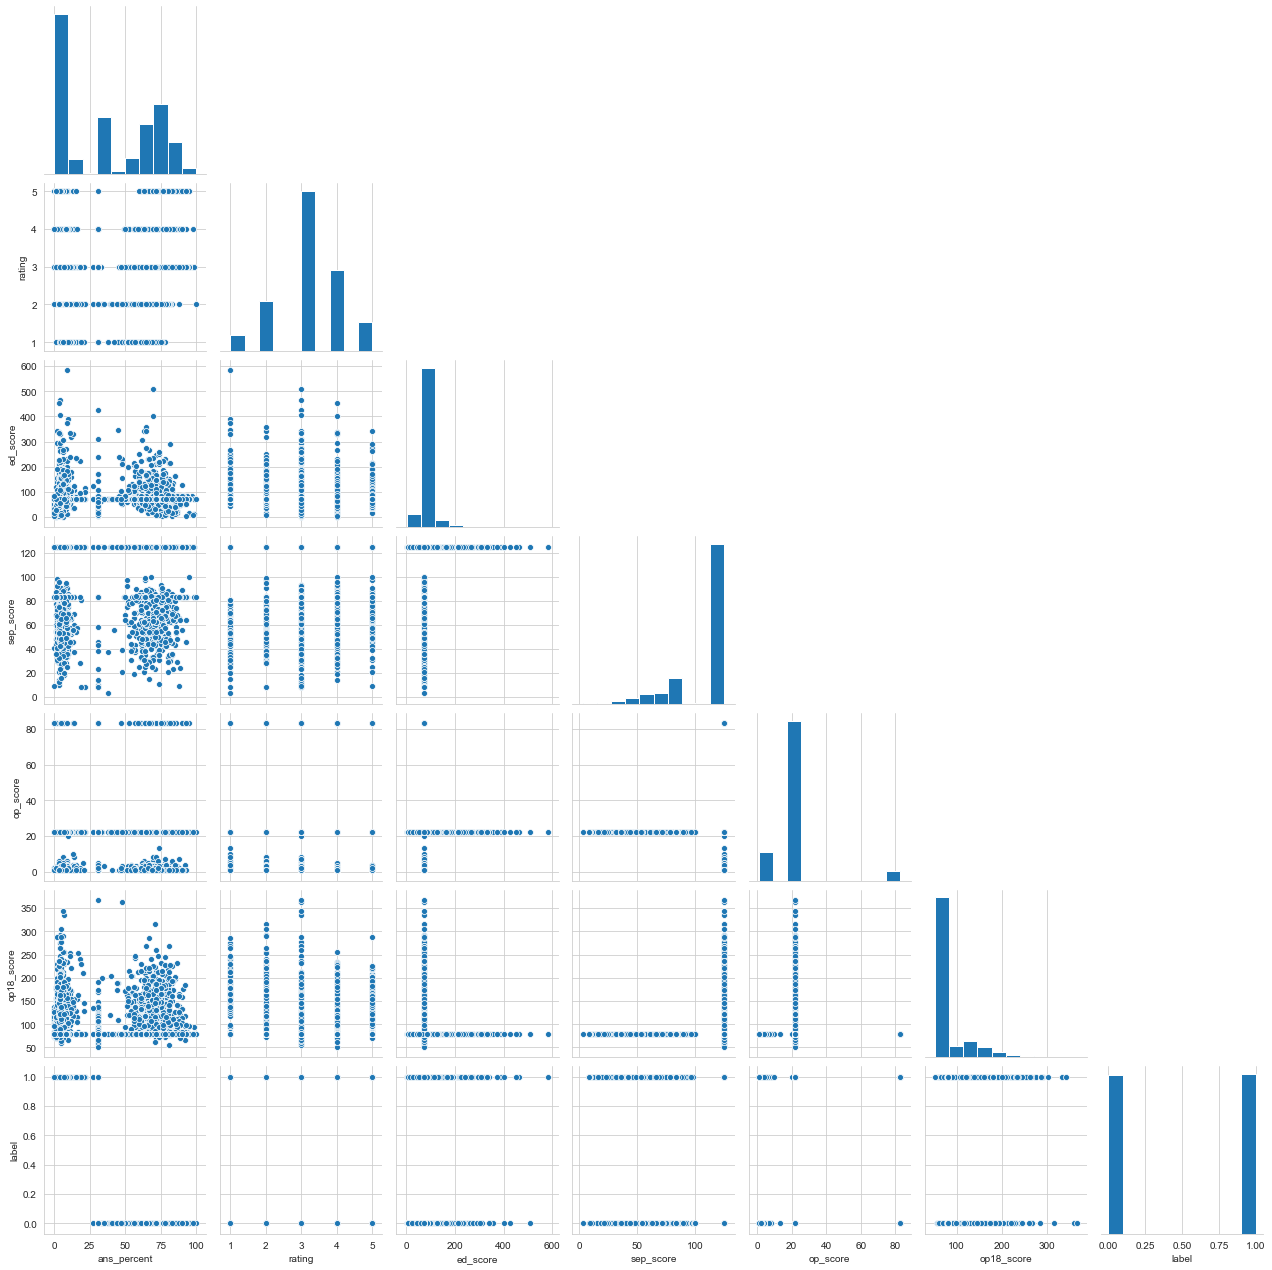

In [74]:
image=sns.pairplot(train.loc[:,'recommend':'label' ] , corner=True) #,height=8.0,aspect=8


In [76]:
figure = image.get_figure()    
figure.savefig('eda101.png', dpi=300)

AttributeError: 'PairGrid' object has no attribute 'get_figure'

In [39]:
train.to_csv('f_ml1.csv',index=False)